In [ ]:
import ezomero
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import biohack_utils.omero_annotation as bhoa
import biohack_utils.config_utils as bhcu

# Load environment variables from .env file
load_dotenv(override = True)


True

In [75]:
conn = ezomero.connect(
    os.getenv("OMERO_USERNAME"), 
    os.getenv("OMERO_PASSWORD"), 
    os.getenv("OMERO_GROUP"),
    host=os.getenv("OMERO_HOST"),
    port=int(os.getenv("OMERO_PORT")),
    secure=os.getenv("OMERO_SECURE") == "True"
)

In [74]:
int_img_id = 51
lab_img_id = 54
lab_img_id2 = 55

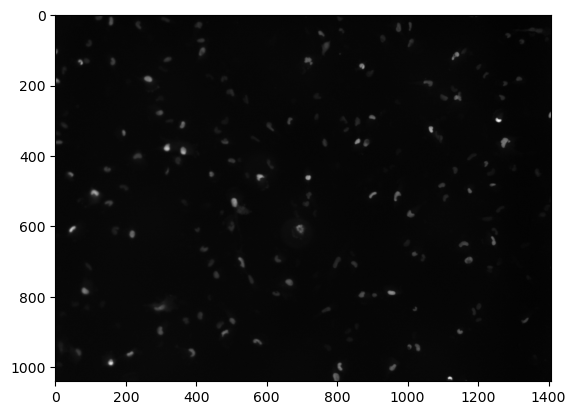

In [76]:
_, img = ezomero.get_image(conn,  int_img_id)
img.shape
plt.imshow(img[0,0,:,:,0], cmap='gray')


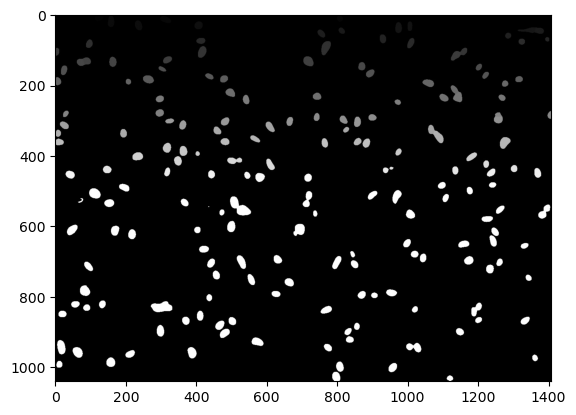

In [59]:
_, img = ezomero.get_image(conn,  lab_img_id)
plt.imshow(img[0,0,:,:], cmap='gray')

## define collection annotation

In [77]:
collection = bhoa._create_collection(conn, "My Collection",version="0.1")
bhoa._link_collection_to_image(conn,collection,int_img_id)
bhoa._link_collection_to_image(conn,collection,lab_img_id)
bhoa._link_collection_to_image(conn,collection,lab_img_id2)

## Now add KVP to the nodes

In [78]:
bhoa._add_node_annotation(conn, int_img_id, "intensities", collection,node_name= "nuclei_raw", 
                          attributes={"origin":"raw","description":"Original nuclei channel","path":"nuclei_raw"})

88

In [79]:
#nuclei segmentation
bhoa._add_node_annotation(conn, lab_img_id, "annotations", collection,node_name= "nuclei_segmentation", 
                          attributes={"origin":"masks","description":"Nuclei segmentation masks","path":"nuclei_segmentation","source":"nuclei_raw"})

89

In [81]:
#cell segmentation
bhoa._add_node_annotation(conn, lab_img_id2, "annotations", collection,node_name= "cell_segmentation", 
                          attributes={"origin":"masks","description":"Cell segmentation masks","path":"cell_segmentation","source":"nuclei_raw"})

90

In [82]:
schema = bhcu.download(conn,collection)
schema.model_dump()


Processing image 51
  Found 1 node annotations via query
  ✓ Match found!

Processing image 54
  Found 1 node annotations via query
  ✓ Match found!

Processing image 55
  Found 1 node annotations via query
  ✓ Match found!

Total flat records collected: 3


{'ome': {'version': '0.1',
  'type': 'collection',
  'name': 'My Collection',
  'nodes': [{'type': 'multiscale',
    'name': 'nuclei_raw',
    'attributes': {'omero_image_id': 51,
     'category': 'intensities',
     'origin': 'raw',
     'source': None,
     'description': 'Original nuclei channel'}},
   {'type': 'multiscale',
    'name': 'nuclei_segmentation',
    'attributes': {'omero_image_id': 54,
     'category': 'annotations',
     'origin': 'masks',
     'source': 'nuclei_raw',
     'description': 'Nuclei segmentation masks'}},
   {'type': 'multiscale',
    'name': 'cell_segmentation',
    'attributes': {'omero_image_id': 55,
     'category': 'annotations',
     'origin': 'masks',
     'source': 'nuclei_raw',
     'description': 'Cell segmentation masks'}}]}}

In [83]:
bhoa._get_collection_members(conn,collection)

[51, 54, 55]

In [84]:
bhoa._get_node_info(conn,int_img_id)

{'category': 'intensities',
 'collection_id': '87',
 'name': 'nuclei_raw',
 'origin': 'raw',
 'description': 'Original nuclei channel',
 'path': 'nuclei_raw'}

In [85]:
bhoa._get_collections(conn,int_img_id)

[{'collection_id': 87,
  'name': 'My Collection',
  'version': '0.1',
  'members': [{'image_id': 51,
    'nodes': {'category': 'intensities',
     'collection_id': '87',
     'name': 'nuclei_raw',
     'origin': 'raw',
     'description': 'Original nuclei channel',
     'path': 'nuclei_raw'}},
   {'image_id': 54,
    'nodes': {'category': 'annotations',
     'collection_id': '87',
     'name': 'nuclei_segmentation',
     'origin': 'masks',
     'description': 'Nuclei segmentation masks',
     'path': 'nuclei_segmentation',
     'source': 'nuclei_raw'}},
   {'image_id': 55,
    'nodes': {'category': 'annotations',
     'collection_id': '87',
     'name': 'cell_segmentation',
     'origin': 'masks',
     'description': 'Cell segmentation masks',
     'path': 'cell_segmentation',
     'source': 'nuclei_raw'}}]}]

In [86]:
bhoa._find_related_images(conn,int_img_id)

[{'image_id': 54,
  'collection_id': 87,
  'nodes': {'category': 'annotations',
   'collection_id': '87',
   'name': 'nuclei_segmentation',
   'origin': 'masks',
   'description': 'Nuclei segmentation masks',
   'path': 'nuclei_segmentation',
   'source': 'nuclei_raw'}},
 {'image_id': 55,
  'collection_id': 87,
  'nodes': {'category': 'annotations',
   'collection_id': '87',
   'name': 'cell_segmentation',
   'origin': 'masks',
   'description': 'Cell segmentation masks',
   'path': 'cell_segmentation',
   'source': 'nuclei_raw'}}]

## Clean up annotations

In [72]:
#delete annotations
map_ann_to_delete = ezomero.get_map_annotation_ids(conn, object_type="Image", object_id=55, ns="ome/collection/nodes")
print(map_ann_to_delete)
conn.deleteObjects('Annotation', map_ann_to_delete, wait=True)  

[78, 82, 86]


f0c224f9-8f53-488b-aad0-417fa597ecc7/IHandle2a1be6f3-2810-4066-8e46-b7f5883d326e -t -e 1.1:tcp -h 172.22.0.3 -p 36783 -t 60000